## 1. Introduction/Business Problem

### 1.1 Discuss the business problem 

In this project I want to define <b>where is the best place to open restaurant in Toronto</b>. To achieve that i need to find out:

How is land use of Torontos neighborhoods?

What kind of venues I can find in Toronto?

What is the probability of occurrence of venues in Torontos neighborhoods?

What are the most popular venues in Toronto's neighborhoods?

My main goal is to determine the place where newly opened restaurant have the bigest chance to be popular place and will turn out to be a business success. I will try to define two markers:

How many restaurants, which can be competitive to my business are in the neighborhood?

What is the kind of venues in the neighborhood? For example if someone going to the theater there is a bigger posibilitie that he will choose to spend a rest of the evening in restaruant.

### 1.2 Who would be interested in this project?

The main stakeholders of this project could be <b>the persons which have an ambitions to run their own restaurant business in Toronto.</b>

## 2.  Data section

To solve the problem from point 1 of this report I will use <b>the following data sources</b>: 

- data provided by Foursquare api, 

- Geopy data,

- data from file provided by Coursera to determine coordinates for places in Toronto.

### 2.1.Install and import appropriate libraries

In [2]:
!pip install bs4
!pip install geocoder
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
! pip install folium==0.5.0

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
#Geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
#Folium
import folium # plotting library
from bs4 import BeautifulSoup
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Istalation compleated!')

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=345b0ad0ed477b870305ee35ae7543330d78d67181639c1f7e6ad1bfd312206d
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
     |████████████████████████████████| 98 kB 8.2 MB/s  eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openm

typing_extensions-3. | 25 KB     | ##################################### | 100% 
protobuf-3.15.6      | 342 KB    | ##################################### | 100% 
libuuid-2.32.1       | 28 KB     | ##################################### | 100% 
_openmp_mutex-4.5    | 5 KB      | ##################################### | 100% 
tifffile-2021.3.17   | 129 KB    | ##################################### | 100% 
llvm-openmp-11.1.0   | 4.7 MB    | ##################################### | 100% 
lxml-4.6.3           | 1.5 MB    | ##################################### | 100% 
astor-0.8.1          | 25 KB     | ##################################### | 100% 
charls-2.2.0         | 138 KB    | ##################################### | 100% 
appdirs-1.4.4        | 13 KB     | ##################################### | 100% 
libglib-2.68.0       | 3.0 MB    | ##################################### | 100% 
opt_einsum-3.3.0     | 51 KB     | ##################################### | 100% 
grpcio-1.36.1        | 2.1 M

testpath-0.4.4       | 85 KB     | ##################################### | 100% 
libllvm11-11.1.0     | 29.1 MB   | ##################################### | 100% 
sqlalchemy-1.4.2     | 2.2 MB    | ##################################### | 100% 
bokeh-2.3.0          | 8.3 MB    | ##################################### | 100% 
pytz-2021.1          | 239 KB    | ##################################### | 100% 
secretstorage-3.3.1  | 24 KB     | ##################################### | 100% 
pyqt-impl-5.12.3     | 5.9 MB    | ##################################### | 100% 
nbformat-5.1.2       | 66 KB     | ##################################### | 100% 
freetds-1.1.15       | 2.4 MB    | ##################################### | 100% 
idna-2.10            | 52 KB     | ##################################### | 100% 
importlib_metadata-3 | 3 KB      | ##################################### | 100% 
libgfortran4-7.5.0   | 1.3 MB    | ##################################### | 100% 
rsa-4.7.2            | 28 KB

patsy-0.5.1          | 187 KB    | ##################################### | 100% 
async-timeout-3.0.1  | 11 KB     | ##################################### | 100% 
keyring-18.0.0       | 50 KB     | ##################################### | 100% 
blas-1.0             | 1 KB      | ##################################### | 100% 
cytoolz-0.11.0       | 403 KB    | ##################################### | 100% 
pandocfilters-1.4.2  | 9 KB      | ##################################### | 100% 
mkl-service-2.3.0    | 54 KB     | ##################################### | 100% 
pygments-2.8.1       | 736 KB    | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
bzip2-1.0.8          | 484 KB    | ##################################### | 100% 
jinja2-2.11.3        | 93 KB     | ##################################### | 100% 
wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
blosc-1.21.0         | 841 K

done
     |████████████████████████████████| 79 kB 8.5 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=1e5c9fe540e57b53c0cd6ba8e0bd4df705c91ee454788d428541293301a1b493
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Istalation compleated!


### 2.2. Localization data processsing

In [3]:
#2.2.1 Import Canada postaql codes from Wikipedia

html_data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

#2.2.2 Create "Beautiful soup" fro mimported data

soup = BeautifulSoup(html_data, 'html.parser')

#2.2.3 Create pandas dataframe with agregated postal code data

data_pc = pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood","Latitude","Longitude"])

for row in soup.find("tbody").find_all("tr"):
    n='Not assigned'
    b='Not assigned'
    cols = row.find_all("td")
    for col in cols:
        span = col.find("span").text
        elements=span.split('(')
        pc =col.find("b").text
        if len(elements) > 0:
            b=elements[0]
        if len(elements) > 1:
            n=elements[1].replace(')','')

        data_pc = data_pc.append({"PostalCode":pc, "Borough":b, "Neighborhood":n}, ignore_index=True)

data_pc = data_pc[data_pc.Borough != "Not assigned"]
data_pc = data_pc.groupby("PostalCode",as_index=False,sort=True).sum()
data_pc = data_pc.reset_index(drop=True)
# Chec if there is some not assigned neighborhoods
data_pc.loc[data_pc['Neighborhood'] == "Not assigned"]

# Show data shape
print("Data shape: " + str(data_pc.shape))


#2.2.4 Import coordinates data from csv

import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_fa9d07a7cae7449c9af7e35a6b5359de = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_fa9d07a7cae7449c9af7e35a6b5359de = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_fa9d07a7cae7449c9af7e35a6b5359de = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Mxq-DqyDnX4DL2AA_jSc2EqhiXtftDwnOOiWhqgPE1iv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_fa9d07a7cae7449c9af7e35a6b5359de)

body = client_fa9d07a7cae7449c9af7e35a6b5359de.get_object(Bucket='datascience-donotdelete-pr-qg7cd0fgwpks0u',Key='Geospatial_Coordinates.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
coordinates = pd.read_csv(body)    

#2.2.5 Asign coordinates 

df = pd.DataFrame()
for index, row in data_pc.iterrows():
    postal = [row['PostalCode']]
    c_row  = coordinates[coordinates['Postal Code'].isin(postal)]
    if c_row['Latitude'].values.size != 0 and c_row['Longitude'].values.size !=0:
        latitude = c_row['Latitude'].values[0].astype(float)
        longitude = c_row['Longitude'].values[0].astype(float)
        row["Latitude"] = latitude
        row["Longitude"] = longitude
    
        df = df.append(row, ignore_index=True)
#2.2.6 Get Totonto coordinates
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
                                       
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

#2.2.7 Get Boroughs that only contains Toronto phrase
df_toronto = pd.DataFrame()
for index, row in df.iterrows():

    if 'Toronto' in row["Borough"]:
        df_toronto = df_toronto.append(row, ignore_index=True)
        
print("Toronto data shape: " + str(df_toronto.shape))

#2.2.8 Generte toronto map
map_pc = folium.Map(location=[latitude, longitude], zoom_start=13)
for index, row in df_toronto.iterrows():
    marker_color= 'black'
    lng = row["Longitude"]
    lat = row["Latitude"]
    borough = row["Borough"]
    neighborhood = row["Neighborhood"]
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    if borough == "Central Toronto":
        marker_color= 'red'
    if borough == "West Toronto":
        marker_color= 'orange'
    if borough == "East Toronto":
        marker_color= 'green'    
    if borough == "Downtown Toronto":
        marker_color= 'blue'        
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color= marker_color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pc)  

Data shape: (103, 5)
The geograpical coordinate of Toronto are 43.6534817, -79.3839347.
Toronto data shape: (39, 5)


#### 2.2.8 Neighborhoods table

In [5]:
df_toronto.head(50)

,Borough,Latitude,Longitude,Neighborhood,PostalCode
0,East Toronto,43.676357,-79.293031,The Beaches,M4E
1,East YorkEast Toronto,43.685347,-79.338106,The Danforth East,M4J
2,East Toronto,43.679557,-79.352188,The Danforth West / Riverdale,M4K
3,East Toronto,43.668999,-79.315572,India Bazaar / The Beaches West,M4L
4,East Toronto,43.659526,-79.340923,Studio District,M4M
5,Central Toronto,43.728020,-79.388790,Lawrence Park,M4N
6,Central Toronto,43.712751,-79.390197,Davisville North,M4P
7,Central Toronto,43.715383,-79.405678,North Toronto West,M4R
8,Central Toronto,43.704324,-79.388790,Davisville,M4S
9,Central Toronto,43.689574,-79.383160,Moore Park / Summerhill East,M4T


#### 2.2.9 Neighborhood map

In [6]:
map_pc

### 2.3. Venues occurence data processing

#### 2.3.1 Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'A40QHA4PJNAT0GHK22B3F0WRT3TDVSSQSOYBQVRIBOBQGSG0' # your Foursquare ID
CLIENT_SECRET = 'PAIZGYJJ1NDJHTJUSYPSSPXBDXYTVSAUMXJIJ5P3CN1UJ5GM' # your Foursquare Secret
ACCESS_TOKEN = 'QQ1KXPEOVQFXCI1XHRIHADFCG1AZCBNAMDM3PJDQ0FUEGAR2' # your FourSquare Access Token
VERSION = '20210304'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: A40QHA4PJNAT0GHK22B3F0WRT3TDVSSQSOYBQVRIBOBQGSG0
CLIENT_SECRET:PAIZGYJJ1NDJHTJUSYPSSPXBDXYTVSAUMXJIJ5P3CN1UJ5GM


#### 2.3.2 Define Foursquare data query elements

In [8]:
limit=500
radius=100
search_query="Restaurant"
print('LIMIT: ' + str(limit))
print('RADIOUS: ' + str(radius))

LIMIT: 500
RADIOUS: 100


#### 2.3.3 Explore venues data

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_toronto['Borough'].unique()),
        df_toronto.shape[0]
    )
)

The dataframe has 7 boroughs and 39 neighborhoods.


#### 2.3.4 Group venues

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

The Beaches
The Danforth  East
The Danforth West / Riverdale
India Bazaar / The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park / Summerhill East
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
Rosedale
St. James Town / Cabbagetown
Church and Wellesley
Regent Park / Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond / Adelaide / King
Harbourfront East / Union Station / Toronto Islands
Toronto Dominion Centre / Design Exchange
Commerce Court / Victoria Hotel
Roselawn
Forest Hill North & West
The Annex / North Midtown / Yorkville
University of Toronto / Harbord
Kensington Market / Chinatown / Grange Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Enclave of M5E
First Canadian Place / Underground city
Christie
Dufferin / Dovercourt Village
Little Portugal / Trinity
Brockton / Parkdale Village / Exhibition

#### 2.3.5 Counted venues table

In [12]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,61,61,61,61,61,61
Brockton / Parkdale Village / Exhibition Place,23,23,23,23,23,23
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,12,12,12,12,12,12
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,71,71,71,71,71,71
Commerce Court / Victoria Hotel,100,100,100,100,100,100
Davisville,35,35,35,35,35,35
Davisville North,9,9,9,9,9,9


#### 2.3.6 Venues table 

In [11]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
toronto_venues.head()

There are 234 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Danforth East,43.685347,-79.338106,Aldwych Park,43.684901,-79.341091,Park


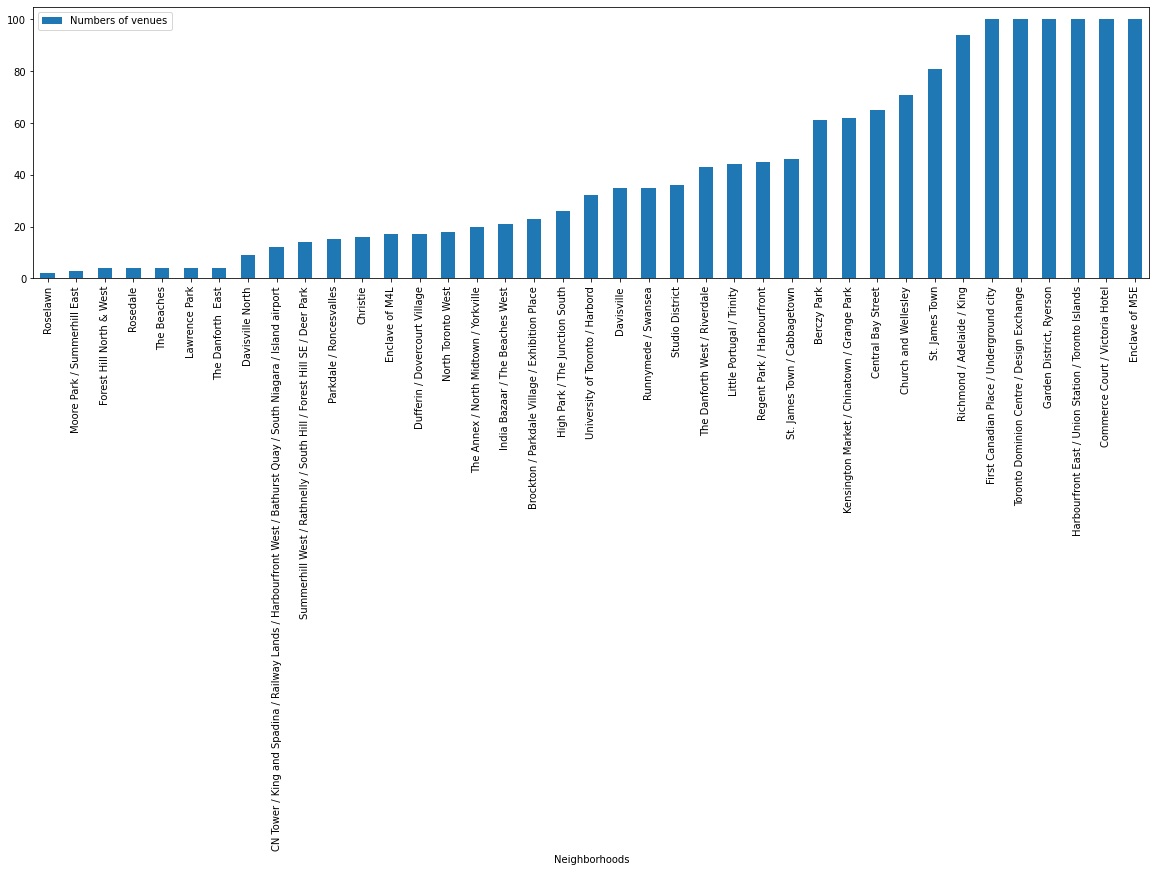

In [35]:
toronto_grouped_venues_plot = toronto_venues.groupby('Neighborhood').count().sort_values(by='Venue')


df = pd.DataFrame({'Neighborhoods':toronto_grouped_venues_plot.index, 'Numbers of venues': toronto_grouped_venues_plot['Venue']})

ax = df.plot.bar(x='Neighborhoods', y='Numbers of venues', rot=90,figsize=(20,5))

### 2.4 Neighborhoods analyze

#### 2.4.1 Table of occurence of venues in neighborhoods

In [39]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(["Neighborhood"], axis=1, inplace=True)

toronto_onehot.insert (0, "Neighborhood", toronto_venues['Neighborhood'])

toronto_onehot.head()

,Neighborhood,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Danforth East,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print("Shape of table: "+ str(toronto_onehot.shape))

Shape of table: (1583, 234)


#### 2.4.2 Frequency of occurence table  of venues in neighborhoods

In [41]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.016393,0.00000,0.000000,0.000000,0.000000
1,Brockton / Parkdale Village / Exhibition Place,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
2,CN Tower / King and Spadina / Railway Lands / ...,0.000000,0.083333,0.083333,0.083333,0.166667,0.166667,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
3,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.015385,0.00000,0.000000,0.015385,0.015385
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.00,...,0.014085,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.028169
6,Commerce Court / Victoria Hotel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00000,0.000000,0.010000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.028571,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
9,Dufferin / Dovercourt Village,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000


In [42]:
print("Shape of table: "+ str(toronto_grouped.shape))

Shape of table: (39, 234)


#### 2.4.3 Popularity of occurence table  of venues in neighborhoods

In [43]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Restaurant,Cheese Shop,Seafood Restaurant,Beer Bar,Farmers Market,Pharmacy,Art Gallery
1,Brockton / Parkdale Village / Exhibition Place,Café,Breakfast Spot,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Burrito Place,Stadium,Furniture / Home Store,Nightclub,Restaurant
2,CN Tower / King and Spadina / Railway Lands / ...,Airport Service,Airport Terminal,Plane,Harbor / Marina,Rental Car Location,Sculpture Garden,Airport,Boat or Ferry,Airport Lounge,Airport Food Court
3,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Burger Joint,Salad Place,Bubble Tea Shop,Thai Restaurant,Comic Shop
4,Christie,Grocery Store,Café,Park,Baby Store,Nightclub,Italian Restaurant,Coffee Shop,Restaurant,Candy Store,Athletics & Sports


### 2.5 Data additional description

After preparation there are two main segments of thata, that will be used to resolve the problem:

A. Neighborhood table (point 2.2.8)
This table brings the localization of neighborhoods in toronto, divided by boroughs.

B. Popularity of occurence table of venues in neighborhoods
This table brings show the most popular venues in each neighborhood.

With data refered above, two marker can be described and used to furthure exploration:

- <b>localization of neighborhoods</b>
- <b>frequency of venues occurrence in neighborhoods</b>


## 3. Calculations

### 3.1 Cluster Neighborhoods

#### 3.1.1 Data will be divided into 4 clusters. K-means algorithm will be used.

In [55]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:1000] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

#### 3.1.2 Add cluster colums to main table with most common venues

In [56]:
##neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_toronto

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head(50) # check the last columns!

,Borough,Latitude,Longitude,Neighborhood,PostalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,43.676357,-79.293031,The Beaches,M4E,0,Health Food Store,Trail,Pub,Adult Boutique,Museum,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant
1,East YorkEast Toronto,43.685347,-79.338106,The Danforth East,M4J,1,Park,Convenience Store,Metro Station,Adult Boutique,Movie Theater,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant
2,East Toronto,43.679557,-79.352188,The Danforth West / Riverdale,M4K,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Ice Cream Shop,Restaurant,Yoga Studio,Fruit & Vegetable Store,Frozen Yogurt Shop
3,East Toronto,43.668999,-79.315572,India Bazaar / The Beaches West,M4L,0,Fast Food Restaurant,Pub,Brewery,Fish & Chips Shop,Food & Drink Shop,Board Shop,Sandwich Place,Liquor Store,Light Rail Station,Steakhouse
4,East Toronto,43.659526,-79.340923,Studio District,M4M,0,Coffee Shop,Brewery,Gastropub,Café,American Restaurant,Bakery,Cheese Shop,Clothing Store,Comfort Food Restaurant,Convenience Store
5,Central Toronto,43.728020,-79.388790,Lawrence Park,M4N,0,Park,Bus Line,Swim School,Business Service,Adult Boutique,Movie Theater,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant
6,Central Toronto,43.712751,-79.390197,Davisville North,M4P,0,Gym / Fitness Center,Breakfast Spot,Sandwich Place,Department Store,Hotel,Food & Drink Shop,Park,Gym,Pizza Place,Mexican Restaurant
7,Central Toronto,43.715383,-79.405678,North Toronto West,M4R,0,Coffee Shop,Clothing Store,Gym / Fitness Center,Bagel Shop,Sporting Goods Shop,Spa,Salon / Barbershop,Restaurant,Park,Mexican Restaurant
8,Central Toronto,43.704324,-79.388790,Davisville,M4S,0,Dessert Shop,Sandwich Place,Pizza Place,Sushi Restaurant,Gym,Café,Coffee Shop,Thai Restaurant,Italian Restaurant,Farmers Market
9,Central Toronto,43.689574,-79.383160,Moore Park / Summerhill East,M4T,1,Playground,Park,Restaurant,Adult Boutique,Museum,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant


#### 3.1.3 Create a map of clustered neighborhoods

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 3.1.4 Define characteristics of clusters

Cluster 1

In [64]:
cluster_1= toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Cluster 2

In [65]:
cluster_2= toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Cluser 3

In [66]:
cluster_3= toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Cluster 4

In [67]:
cluster_4=toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [68]:
cluster_1

,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.676357,0,Health Food Store,Trail,Pub,Adult Boutique,Museum,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant
2,43.679557,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Bookstore,Furniture / Home Store,Ice Cream Shop,Restaurant,Yoga Studio,Fruit & Vegetable Store,Frozen Yogurt Shop
3,43.668999,0,Fast Food Restaurant,Pub,Brewery,Fish & Chips Shop,Food & Drink Shop,Board Shop,Sandwich Place,Liquor Store,Light Rail Station,Steakhouse
4,43.659526,0,Coffee Shop,Brewery,Gastropub,Café,American Restaurant,Bakery,Cheese Shop,Clothing Store,Comfort Food Restaurant,Convenience Store
5,43.728020,0,Park,Bus Line,Swim School,Business Service,Adult Boutique,Movie Theater,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant
6,43.712751,0,Gym / Fitness Center,Breakfast Spot,Sandwich Place,Department Store,Hotel,Food & Drink Shop,Park,Gym,Pizza Place,Mexican Restaurant
7,43.715383,0,Coffee Shop,Clothing Store,Gym / Fitness Center,Bagel Shop,Sporting Goods Shop,Spa,Salon / Barbershop,Restaurant,Park,Mexican Restaurant
8,43.704324,0,Dessert Shop,Sandwich Place,Pizza Place,Sushi Restaurant,Gym,Café,Coffee Shop,Thai Restaurant,Italian Restaurant,Farmers Market
10,43.686412,0,Coffee Shop,Liquor Store,Bagel Shop,Pub,Restaurant,Light Rail Station,Fried Chicken Joint,Supermarket,Sushi Restaurant,Bank
12,43.667967,0,Pizza Place,Coffee Shop,Park,Pub,Bakery,Café,Chinese Restaurant,Italian Restaurant,Restaurant,Convenience Store


Because clustering above not giving a clear answer where is the good place to run restaurant, data will be detailed and 10 most common venues will be divided on four groups:
- restaurants
- places to Eat & Drink other than restaurant
- other

In [74]:
toronto_merged_detailed_cluster_1 = toronto_merged
toronto_merged_detailed_cluster_1['restaurants'] = 0    
toronto_merged_detailed_cluster_1['eat&drink'] = 0
toronto_merged_detailed_cluster_1['other'] = 0
venues = [
    "1st Most Common Venue",
    "2nd Most Common Venue",
    "3rd Most Common Venue",
    "4th Most Common Venue",
    "5th Most Common Venue",
    "6th Most Common Venue",
    "7th Most Common Venue",
    "8th Most Common Venue",
    "9th Most Common Venue",
    "10th Most Common Venue",
]
toronto_detailed_data = pd.DataFrame(columns=["restaurants", "eat&drink", "other", "Neighborhood"])
for index, row in toronto_merged_detailed_cluster_1.iterrows():
    for v in venues:
        
    
        if "Restaurant" in row[v]:
            row['restaurants'] = row['restaurants'] + 1
        elif "Pub" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Bar" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Fast" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Fish" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Sandwich" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Frozen" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Café" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Gastropub" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Hotel" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Pizza" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        elif "Coffee" in row[v]:
            row['eat&drink'] = row['eat&drink'] + 1
        else:
            row['other'] = row['other'] + 1

    r=row['restaurants']   
    e=row['eat&drink']
    o=row['other']
    n=row['Neighborhood']
    
    toronto_detailed_data  = toronto_detailed_data.append({"restaurants":r, "eat&drink":e, "other":o, "Neighborhood":n}, ignore_index=True)

toronto_detailed_data.head(50)

,restaurants,eat&drink,other,Neighborhood
0,3,1,6,The Beaches
1,3,0,7,The Danforth East
2,3,2,5,The Danforth West / Riverdale
3,1,3,6,India Bazaar / The Beaches West
4,2,3,5,Studio District
5,2,0,8,Lawrence Park
6,1,3,6,Davisville North
7,2,2,6,North Toronto West
8,3,4,3,Davisville
9,4,0,6,Moore Park / Summerhill East


In [75]:
# set number of clusters
kclusters = 4

toronto_grouped_clustering_detailed = toronto_detailed_data.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering_detailed)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:1000] 

array([2, 2, 0, 0, 0, 3, 0, 0, 1, 2, 0, 3, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 1, 3, 1, 1, 0, 0, 1, 0, 1, 2, 1, 3], dtype=int32)

In [76]:
toronto_detailed_data.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged_detailed = df_toronto

toronto_merged_detailed = toronto_merged_detailed.join(toronto_detailed_data.set_index('Neighborhood'), on='Neighborhood')

toronto_merged_detailed.head(50) # check the last columns!

,Borough,Latitude,Longitude,Neighborhood,PostalCode,Cluster Labels,restaurants,eat&drink,other
0,East Toronto,43.676357,-79.293031,The Beaches,M4E,2,3,1,6
1,East YorkEast Toronto,43.685347,-79.338106,The Danforth East,M4J,2,3,0,7
2,East Toronto,43.679557,-79.352188,The Danforth West / Riverdale,M4K,0,3,2,5
3,East Toronto,43.668999,-79.315572,India Bazaar / The Beaches West,M4L,0,1,3,6
4,East Toronto,43.659526,-79.340923,Studio District,M4M,0,2,3,5
5,Central Toronto,43.728020,-79.388790,Lawrence Park,M4N,3,2,0,8
6,Central Toronto,43.712751,-79.390197,Davisville North,M4P,0,1,3,6
7,Central Toronto,43.715383,-79.405678,North Toronto West,M4R,0,2,2,6
8,Central Toronto,43.704324,-79.388790,Davisville,M4S,1,3,4,3
9,Central Toronto,43.689574,-79.383160,Moore Park / Summerhill East,M4T,2,4,0,6


In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_detailed['Latitude'], toronto_merged_detailed['Longitude'], toronto_merged_detailed['Neighborhood'], toronto_merged_detailed['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-4],
        fill=True,
        fill_color=rainbow[cluster-4],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [82]:
toronto_merged_detailed.loc[toronto_merged_detailed['Cluster Labels'] == 0, toronto_merged_detailed.columns[[3] + list(range(5, toronto_merged_detailed.shape[1]))]]

,Neighborhood,Cluster Labels,restaurants,eat&drink,other
2,The Danforth West / Riverdale,0,3,2,5
3,India Bazaar / The Beaches West,0,1,3,6
4,Studio District,0,2,3,5
6,Davisville North,0,1,3,6
7,North Toronto West,0,2,2,6
10,Summerhill West / Rathnelly / South Hill / For...,0,2,2,6
14,Regent Park / Harbourfront,0,1,3,6
16,St. James Town,0,1,5,4
17,Berczy Park,0,2,3,5
19,Richmond / Adelaide / King,0,2,3,5


In [83]:
toronto_merged_detailed.loc[toronto_merged_detailed['Cluster Labels'] == 1, toronto_merged_detailed.columns[[3] + list(range(5, toronto_merged_detailed.shape[1]))]]

,Neighborhood,Cluster Labels,restaurants,eat&drink,other
8,Davisville,1,3,4,3
12,St. James Town / Cabbagetown,1,3,4,3
13,Church and Wellesley,1,4,5,1
15,"Garden District, Ryerson",1,4,2,4
18,Central Bay Street,1,3,3,4
21,Toronto Dominion Centre / Design Exchange,1,5,3,2
22,Commerce Court / Victoria Hotel,1,5,4,1
26,University of Toronto / Harbord,1,4,3,3
27,Kensington Market / Chinatown / Grange Park,1,3,3,4
29,Enclave of M5E,1,4,4,2


In [84]:
toronto_merged_detailed.loc[toronto_merged_detailed['Cluster Labels'] == 2, toronto_merged_detailed.columns[[3] + list(range(5, toronto_merged_detailed.shape[1]))]]

,Neighborhood,Cluster Labels,restaurants,eat&drink,other
0,The Beaches,2,3,1,6
1,The Danforth East,2,3,0,7
9,Moore Park / Summerhill East,2,4,0,6
23,Roselawn,2,3,0,7
24,Forest Hill North & West,2,3,0,7
36,Parkdale / Roncesvalles,2,3,1,6


In [85]:
toronto_merged_detailed.loc[toronto_merged_detailed['Cluster Labels'] == 3, toronto_merged_detailed.columns[[3] + list(range(5, toronto_merged_detailed.shape[1]))]]

,Neighborhood,Cluster Labels,restaurants,eat&drink,other
5,Lawrence Park,3,2,0,8
11,Rosedale,3,2,0,8
28,CN Tower / King and Spadina / Railway Lands / ...,3,0,0,10
38,Enclave of M4L,3,1,0,9
